In [2]:
from __future__ import annotations
from pathlib import Path
import math
from typing import List
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.patches import FancyArrowPatch, Wedge, PathPatch  # type: ignore
from matplotlib import cm as mpl_cm  # type: ignore
import networkx as nx  # type: ignore
import numpy as np  # type: ignore
import plotly.graph_objects as go  # type: ignore
from matplotlib.path import Path as MplPath  # type: ignore
import pandas as pd  # type: ignore

In [3]:
csv_path = "./smartphone_brand_migration_2023.csv"
df_flow = pd.read_csv(csv_path)
brands = sorted(set(df_flow["source"]).union(df_flow["target"]))
brand_index = {b: i for i, b in enumerate(brands)}

n = len(brands)
mig = np.zeros((n, n))
for _, row in df_flow.iterrows():
    i = brand_index[row["source"]]
    j = brand_index[row["target"]]
    mig[i, j] = row["percent"]

src, tgt, val, col = [], [], [], []
brand_colours = mpl_cm.get_cmap("Set3")(np.linspace(0, 1, n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue  # ignore loyal customers for clarity
        src.append(i)
        tgt.append(j)
        val.append(mig[i, j])
        col.append(f"rgba({brand_colours[i][0]*255:.0f},{brand_colours[i][1]*255:.0f},{brand_colours[i][2]*255:.0f},0.7)")

theta = np.linspace(0, 2 * math.pi, n, endpoint=False)
node_x = 0.5 + 0.4 * np.cos(theta)  # centre at (0.5,0.5) radius 0.4
node_y = 0.5 + 0.4 * np.sin(theta)

sankey = go.Sankey(
    arrangement="fixed",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(width=0.5, color="black"),
        label=brands,
        color=[f"rgb({r*255:.0f},{g*255:.0f},{b*255:.0f})" for r, g, b, _ in brand_colours],
        x=node_x,
        y=node_y,
    ),
    link=dict(source=src, target=tgt, value=val, color=col),
)

fig = go.Figure(sankey)
fig.update_layout(
    title_text="Smartphone Brand Switching – Radial Sankey",
    font=dict(size=11),
    width=800,
    height=800,
    margin=dict(t=50, b=50, l=50, r=50),
)

fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/3205465068.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  brand_colours = mpl_cm.get_cmap("Set3")(np.linspace(0, 1, n))


In [4]:
def _arc_between(p0: tuple[float, float], p1: tuple[float, float], rad: float = 0.2, resolution: int = 100):

    mx, my = (p0[0] + p1[0]) / 2, (p0[1] + p1[1]) / 2
    nx, ny = -my, mx
    cx, cy = mx + rad * nx, my + rad * ny

    t = np.linspace(0, 1, resolution)
    x = (1 - t) ** 2 * p0[0] + 2 * (1 - t) * t * cx + t ** 2 * p1[0]
    y = (1 - t) ** 2 * p0[1] + 2 * (1 - t) * t * cy + t ** 2 * p1[1]
    return x, y

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/854401357.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/854401357.py:40: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



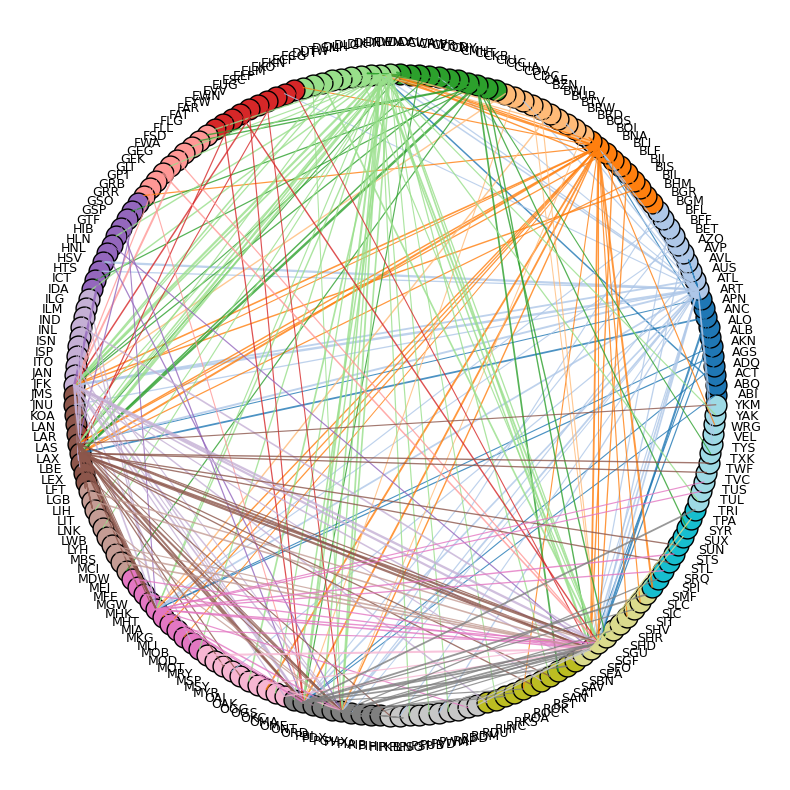

In [5]:
df_routes = pd.read_csv("./airport_routes.csv")
cities = sorted(set(df_routes["source"]).union(df_routes["target"]))
city_index = {c: i for i, c in enumerate(cities)}
n = len(cities)

G = nx.Graph()
G.add_nodes_from(cities)
for _, row in df_routes.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["passengers_millions"])

angles = np.linspace(0, 2 * np.pi, len(cities), endpoint=False)
pos = {city: (np.cos(a), np.sin(a)) for city, a in zip(cities, angles)}

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.axis("off")

node_colors = mpl_cm.get_cmap("tab20")(np.linspace(0, 1, n))
for idx, city in enumerate(cities):
    x, y = pos[city]
    ax.plot(x, y, "o", markersize=15, color=node_colors[idx], markeredgecolor="k")
    ax.text(
        1.1 * x,
        1.1 * y,
        city,
        ha="center",
        va="center",
        fontsize=9,
    )

for u, v, d in G.edges(data=True):
    w = d["weight"]
    x_arr, y_arr = _arc_between(pos[u], pos[v], rad=0.25)
    idx_color = cities.index(u)
    ax.plot(x_arr, y_arr, color=node_colors[idx_color], linewidth=0.4 + 0.4 * w, alpha=0.8)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/4183736950.py:22: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/4183736950.py:80: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



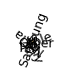

In [6]:
brands = ["Apple", "Samsung", "Nokia", "LG", "Sony", "Other"]
n = len(brands)

mig = np.array(
    [
        [0, 15, 5, 8, 5, 7],
        [10, 0, 4, 6, 5, 10],
        [12, 50, 0, 8, 5, 10],
        [14, 20, 6, 0, 7, 8],
        [11, 18, 4, 5, 0, 12],
        [18, 20, 8, 10, 12, 0],
    ]
)

total = mig.sum()
brand_totals = mig.sum(axis=1)  # outflow size

theta_gap = 2 * math.pi * 0.02  # 2% gap between groups
arc_lengths = 2 * math.pi * brand_totals / total
start_angle = 0.0

cmap = mpl_cm.get_cmap("Set3")
brand_colors = cmap(np.linspace(0, 1, n))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.axis("off")

angle_ranges: list[tuple[float, float]] = []

for i in range(n):
    theta1 = math.degrees(start_angle)
    theta2 = math.degrees(start_angle + arc_lengths[i])
    wedge = Wedge((0, 0), 1.0, theta1, theta2, width=0.1, facecolor=brand_colors[i], edgecolor="white")
    ax.add_patch(wedge)

    angle_ranges.append((start_angle, start_angle + arc_lengths[i]))
    mid = (start_angle + start_angle + arc_lengths[i]) / 2
    ax.text(1.15 * math.cos(mid), 1.15 * math.sin(mid), brands[i], ha="center", va="center", fontsize=9, rotation=math.degrees(mid), rotation_mode="anchor")

    start_angle += arc_lengths[i] + theta_gap

current_pos = np.array([angle_ranges[i][0] for i in range(n)])

def draw_chord(i: int, j: int, value: float) -> None:
    if value == 0:
        return
    sub_angle = (arc_lengths[i] * value / brand_totals[i]) if brand_totals[i] > 0 else 0
    start_i = current_pos[i]
    end_i = start_i + sub_angle
    current_pos[i] = end_i  # update tracker

    mid_i = (start_i + end_i) / 2

    sub_angle_j = (arc_lengths[j] * value / brand_totals[j]) if brand_totals[j] > 0 else 0
    start_j = current_pos[j]
    end_j = start_j + sub_angle_j
    current_pos[j] = end_j
    mid_j = (start_j + end_j) / 2

    r_inner = 0.9
    x0, y0 = r_inner * math.cos(mid_i), r_inner * math.sin(mid_i)
    x3, y3 = r_inner * math.cos(mid_j), r_inner * math.sin(mid_j)

    r_ctrl = 0.3
    x1, y1 = r_ctrl * math.cos(mid_i), r_ctrl * math.sin(mid_i)
    x2, y2 = r_ctrl * math.cos(mid_j), r_ctrl * math.sin(mid_j)

    verts = [(x0, y0), (x1, y1), (x2, y2), (x3, y3)]
    codes = [MplPath.MOVETO, MplPath.CURVE4, MplPath.CURVE4, MplPath.CURVE4]
    path = MplPath(verts, codes)
    patch = PathPatch(path, facecolor="none", edgecolor=brand_colors[i], linewidth=1.5, alpha=0.7)
    ax.add_patch(patch)

for i in range(n):
    for j in range(i + 1, n):
        draw_chord(i, j, mig[i, j])
        draw_chord(j, i, mig[j, i])

plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/1220873028.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_15805/1220873028.py:69: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



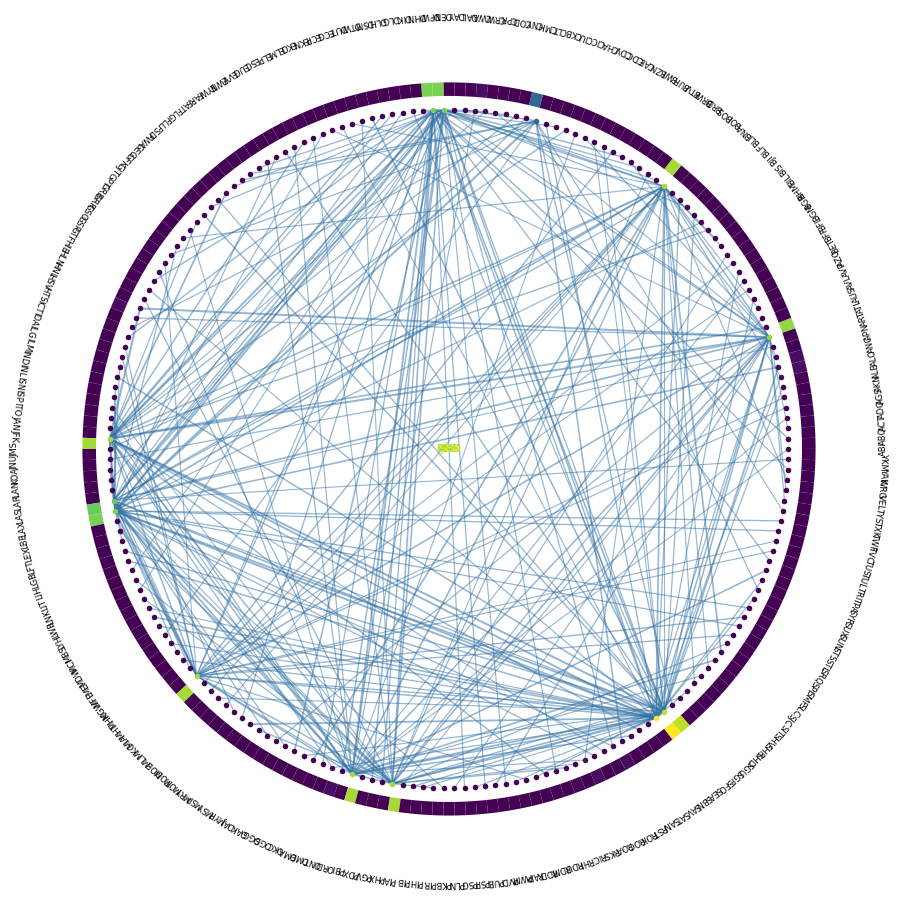

In [7]:
csv_path = "./airport_routes.csv"
df_edges = pd.read_csv(csv_path)

G = nx.Graph()
for _, row in df_edges.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["passengers_millions"])

nodes = sorted(G.nodes())
n_nodes = len(nodes)

angles = np.linspace(0, 2 * math.pi, n_nodes, endpoint=False)
pos = {node: (math.cos(a), math.sin(a)) for node, a in zip(nodes, angles)}

degrees = np.array([G.degree(node) for node in nodes])
deg_range = float(np.ptp(degrees)) if np.ptp(degrees) != 0 else 1.0
norm_deg = (degrees - degrees.min()) / deg_range
cmap = mpl_cm.get_cmap("viridis")
node_colors = cmap(norm_deg)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
ax.axis("off")

for u, v, d in G.edges(data=True):
    x_vals = [pos[u][0], pos[v][0]]
    y_vals = [pos[u][1], pos[v][1]]
    w = d["weight"]
    ax.plot(x_vals, y_vals, color="#2F6FA5", alpha=0.5, linewidth=0.5 + 0.3 * w)

for idx, node in enumerate(nodes):
    x, y = pos[node]
    ax.plot(x, y, "o", markersize=4, color=node_colors[idx], markeredgecolor="none")

    label = node  # use airport code
    angle_deg = math.degrees(angles[idx])
    ax.text(
        1.28 * x,
        1.28 * y,
        label,
        ha="center",
        va="center",
        fontsize=6,
        rotation=angle_deg + 90 if angle_deg < 180 else angle_deg - 90,
        rotation_mode="anchor",
    )

high_deg_idx = degrees.argsort()[-8:]
for idx in high_deg_idx:
    ax.text(
        0.0,
        0.0,
        nodes[idx],
        color=node_colors[idx],
        fontsize=8,
        ha="center",
        va="center",
        alpha=0.8,
    )

for i in range(n_nodes):
    start_angle = math.degrees(angles[i])
    end_angle = math.degrees(angles[i] + 2 * math.pi / n_nodes)
    wedge = Wedge((0, 0), 1.08, start_angle, end_angle, width=0.04, facecolor=node_colors[i], edgecolor="none")
    ax.add_patch(wedge)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

plt.tight_layout()
fig.show()